In [7]:
import numpy             as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(24,12)

from osgeo import gdal


def get_image_array(
    image_path: str
) -> np.ndarray:

    """
    Load a interferogram .tif from storage into an array.

    Parameters:
    -----------
    image_path : str
        The path to the interferogram .tif to be opened.

    Returns:
    --------
    arr : np.ndarray
        The interferogram array.
    """

    dataset = gdal.Open(image_path, gdal.GA_ReadOnly)
    band = dataset.GetRasterBand(1)
    arr = band.ReadAsArray()

    return arr, dataset

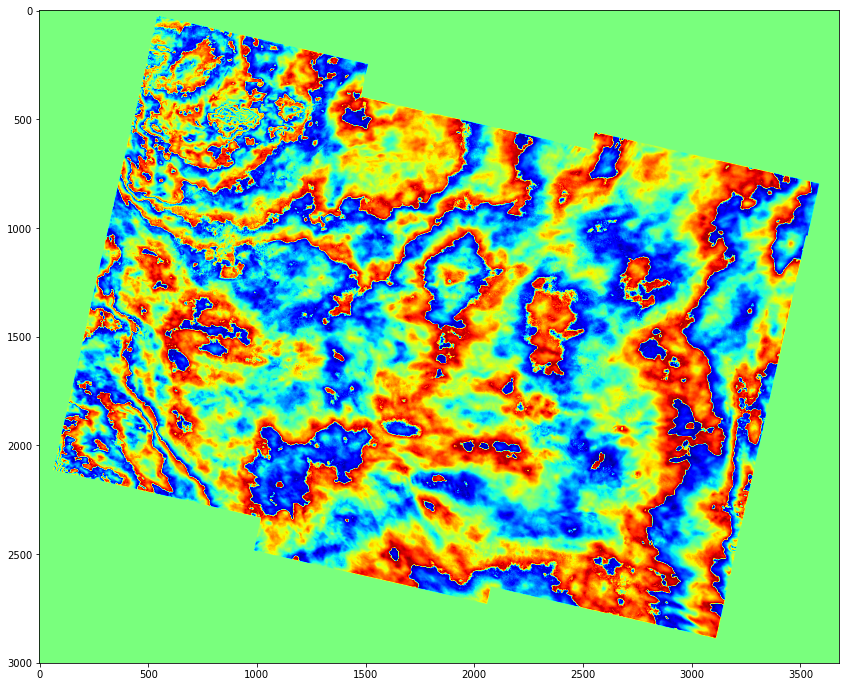

In [9]:
path_to_image = "/mnt/d/SAR_DATA/Negatives/S1AA_20191231T204124_20200112T204123_VVP012_INT80_G_ueF_A2BB_wrapped_phase.tif"

image, _ = get_image_array(path_to_image)

wrapped_image = np.angle(np.exp(1j * image))

plt.imshow(wrapped_image, cmap='jet')